Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import glob
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

In [2]:
IMG_DIR='datasets/flowers/daisy'
IMG_DIR1='datasets/flowers/dandelion'
IMG_DIR2='datasets/flowers/rose'
IMG_DIR3='datasets/flowers/sunflower'
IMG_DIR4='datasets/flowers/tulip'

def read_images(directory):
    for img in glob.glob(directory+"/*.jpg"):
        image = cv2.imread(img)
        resized_img = cv2.resize(image/255.0  , (180 ,180))

        yield resized_img

resized_imgs0 =  np.array(list(read_images(IMG_DIR)))
resized_imgs1 =  np.array(list(read_images(IMG_DIR1)))
resized_imgs2 =  np.array(list(read_images(IMG_DIR2)))
resized_imgs3 =  np.array(list(read_images(IMG_DIR3)))
resized_imgs4 =  np.array(list(read_images(IMG_DIR4)))

In [3]:
resized_imgs0.shape

(769, 180, 180, 3)

In [4]:
label0 = np.zeros((resized_imgs0.shape[0],1))   #0
label1 = np.ones((resized_imgs1.shape[0],1))  #1
label2 = np.ones((resized_imgs2.shape[0],1))*2 #2
label3 = np.ones((resized_imgs3.shape[0],1))*3 #3
label4 = np.ones((resized_imgs4.shape[0],1))*4  #4

In [5]:
data = np.concatenate((resized_imgs0,resized_imgs1,resized_imgs2,resized_imgs3,resized_imgs4))

In [6]:
del resized_imgs0
del resized_imgs1
del resized_imgs2
del resized_imgs3
del resized_imgs4

In [7]:
data= data.reshape(data.shape[0], data.shape[1]*data.shape[2]*data.shape[3])

In [8]:
labels = np.concatenate((label0,label1,label2,label3,label4))

In [9]:
del label0
del label1
del label2
del label3
del label4

In [10]:
data = pd.DataFrame(data)
data['labels'] = labels.astype('float32')

In [11]:
train_data, test_data, train_labels, test_labels=train_test_split(data.iloc[0:,:-1], data['labels'], test_size=0.3, random_state=42, stratify = labels)

In [12]:
del data

In [13]:
train_data = np.array(train_data).reshape(len(train_data),180,180,3)
# test_data.reshape(150,150,3)

In [14]:
test_data = np.array(test_data).reshape(len(test_data),180,180,3)

In [15]:
train_labels = np.array(train_labels).astype('float32')
test_labels = np.array(test_labels).astype('float32')

In [42]:
# from keras.utils import to_categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [16]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    # featurewise_center=True,
    # samplewise_center=True,
    # featurewise_std_normalization=True,
    # samplewise_std_normalization=True,
    # zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.3,
    zoom_range=0.2,
    channel_shift_range=0.3,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [17]:
data_gen.fit(train_data)

In [18]:
data_gen.fit(test_data)

In [19]:
#MOdels with COnv2D and Maxpooling
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [20]:
model.compile(optimizer=RMSprop(learning_rate= 0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
#%tensorflow_version 2.x
#import tensorflow as tf

In [21]:
result = model.fit(
          x= train_data,
          y= train_labels,
          batch_size = 30,
          steps_per_epoch=30,
          epochs=500,
          validation_split=0.3,
          validation_steps=10,
          validation_batch_size=10)

Epoch 1/10
30/30 [==============================] - 68s 2s/step - loss: 1.6104 - accuracy: 0.2213 - val_loss: 1.5608 - val_accuracy: 0.3500
Epoch 2/10
30/30 [==============================] - 48s 2s/step - loss: 1.5718 - accuracy: 0.2849 - val_loss: 1.4399 - val_accuracy: 0.3800
Epoch 3/10
30/30 [==============================] - 42s 1s/step - loss: 1.4406 - accuracy: 0.3649 - val_loss: 1.3010 - val_accuracy: 0.4800
Epoch 4/10
30/30 [==============================] - 42s 1s/step - loss: 1.3398 - accuracy: 0.4377 - val_loss: 1.2329 - val_accuracy: 0.5100
Epoch 5/10
30/30 [==============================] - 41s 1s/step - loss: 1.2195 - accuracy: 0.4699 - val_loss: 1.1890 - val_accuracy: 0.5200
Epoch 6/10
30/30 [==============================] - 42s 1s/step - loss: 1.2144 - accuracy: 0.4792 - val_loss: 1.1866 - val_accuracy: 0.5400
Epoch 7/10
30/30 [==============================] - 44s 1s/step - loss: 1.1654 - accuracy: 0.5160 - val_loss: 1.2422 - val_accuracy: 0.4300
Epoch 8/10
30/30 [==

In [22]:
model.evaluate(test_data,test_labels)

41/41 [==============================] - 16s 389ms/step - loss: 1.1635 - accuracy: 0.4880


[1.1635488271713257, 0.48804935812950134]

In [23]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

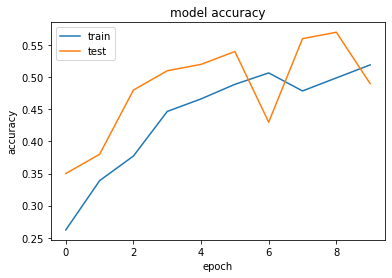

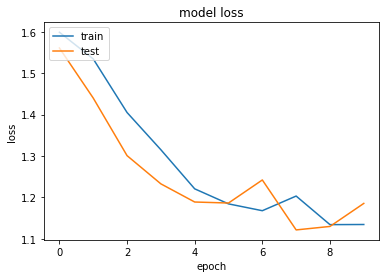

In [24]:
import matplotlib.pyplot as plt

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
y_pred1 = model.predict(test_data)

In [26]:
y_pred1.shape

(1297, 5)

In [27]:
np.argmax(y_pred1, axis=1)[0:30]

array([2, 2, 2, 2, 4, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 2, 0, 1, 0,
       4, 3, 0, 2, 1, 0, 4, 1], dtype=int64)

In [28]:
np.array(test_labels[0:30]).astype('int32')

array([4, 0, 2, 4, 4, 4, 1, 3, 4, 2, 3, 3, 4, 2, 2, 4, 2, 2, 2, 1, 1, 0,
       4, 3, 1, 4, 3, 1, 4, 1])